In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
def extract_author_title(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    title = file_path.split('/')[4]
    
    author_pattern = re.compile(r'\b(Mme|Madame|M|Mr|Dr|Docteur|docteur|Monsieur|monsieur|madame|professeur|Professeur)\b\s?[A-Z][a-zA-Z]*\s?[A-Z]?[a-zA-Z]*')
    author_match = author_pattern.search(content[:500])
    author = author_match.group(0) if author_match else 'auteur inconnu'
    
    return title, author


In [41]:
def load_authors(directory_path):
    data_mixtes = []

    for subdirectory in os.listdir(directory_path):
        subdirectory_path = os.path.join(directory_path, subdirectory)
        if os.path.isdir(subdirectory_path):

            num_pages = len([filename for filename in os.listdir(subdirectory_path) if filename.endswith('.txt')])

            for filename in os.listdir(subdirectory_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(subdirectory_path, filename)
                    title, author = extract_author_title(file_path)
                    if author != 'auteur inconnu':
                        data_mixtes.append([title, author, num_pages])

    df = pd.DataFrame(data_mixtes, columns=['Titre', 'Auteur', 'Nbr_pages'])
    df['Auteur'] = df['Auteur'].str.replace('\n', ' ')  
    name = directory_path.split('_')[-1]
    df.to_csv(f'../data/contexte/contexte_{name}.csv', index=False)

In [ ]:
directory_mixte = '../data/txt/ouvrages_mixtes'
load_authors(directory_mixte)
directory_masculins = '../data/txt/ouvrages_masculins'
load_authors(directory_masculins)
directory_feminins = '../data/txt/ouvrages_feminins'
load_authors(directory_feminins)

In [3]:
def process_directory(directory, output_csv):
    data = []

    for subdirectory in os.listdir(directory):
        subdirectory_path = os.path.join(directory, subdirectory)
        if os.path.isdir(subdirectory_path):
            for filename in os.listdir(subdirectory_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(subdirectory_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                    title = file_path.split('/')[4]
                    years = re.findall(r'\b(18[0-9]{2}|19[0-9]{2})', content)
                    if years:
                        data.append([title, ', '.join(years)])

    df_years = pd.DataFrame(data, columns=['Titre', 'Années'])
    df_years = df_years.groupby("Titre")["Années"].apply(lambda x: ', '.join(sorted(set(', '.join(x).split(', '))))).reset_index()
    df_years.to_csv(output_csv, index=False)

# Process each directory and create the corresponding CSV files
process_directory('../data/txt/ouvrages_mixtes', '../data/contexte/years_mixtes.csv')
process_directory('../data/txt/ouvrages_feminins', '../data/contexte/years_feminins.csv')
process_directory('../data/txt/ouvrages_masculins', '../data/contexte/years_masculins.csv')

In [4]:
def process_year_publication(directory, output_csv):
    data = []

    for subdirectory in os.listdir(directory):
            subdirectory_path = os.path.join(directory, subdirectory)
            if os.path.isdir(subdirectory_path):
                for filename in os.listdir(subdirectory_path):
                    if filename == 'page_2.txt':
                        file_path = os.path.join(subdirectory_path, filename)
                        with open(file_path, 'r', encoding='utf-8') as file:
                            content = file.read()
                        title = file_path.split('/')[4]
                        years = re.findall(r'\b(18[0-9]{2}|19[0-4][0-9])', content)
                        if years :
                            data.append([title, ', '.join(years)])

    df_years = pd.DataFrame(data, columns=['Titre', 'Année'])
    df_years = df_years.groupby("Titre")["Année"].apply(lambda x: ', '.join(sorted(set(', '.join(x).split(', '))))).reset_index()
    df_years.to_csv(output_csv, index=False)
        
process_year_publication('../data/txt/ouvrages_mixtes', '../data/contexte/years_mixtes_p2.csv')
process_year_publication('../data/txt/ouvrages_feminins', '../data/contexte/years_feminins_p2.csv')
process_year_publication('../data/txt/ouvrages_masculins', '../data/contexte/years_masculins_p2.csv')
        

In [3]:
# Load the data from the CSV files
df_years_mixtes = pd.read_csv('../data/contexte/years_mixtes_p2.csv')
df_years_feminins = pd.read_csv('../data/contexte/years_feminins_p2.csv')
df_years_masculins = pd.read_csv('../data/contexte/years_masculins_p2.csv')
"""# Explode the 'Année' column to create a new row for each year
df_years_feminins['Année'] = df_years_feminins['Année'].str.strip('[]').str.replace(' ', '').str.split(',')
df_years_feminins = df_years_feminins.explode('Année')

df_years_masculins['Année'] = df_years_masculins['Année'].str.strip('[]').str.replace(' ', '').str.split(',')
df_years_masculins = df_years_masculins.explode('Année')"""

# Combine the dataframes for plotting
df_years_mixtes['Category'] = 'Mixtes'
df_years_feminins['Category'] = 'Feminins'
df_years_masculins['Category'] = 'Masculins'
df_combined = pd.concat([df_years_mixtes, df_years_feminins, df_years_masculins])

In [4]:
df_combined = df_combined.explode('Année')
df_combined['Année'] = df_combined['Année'].astype(int)
# Display the updated dataframe
df_combined.sort_values(by='Année')

,Titre,Année,Category
14,21,1829,Masculins
6,10,1853,Masculins
5,09,1854,Masculins
15,22,1854,Masculins
11,18_Hygiè,1857,Masculins
9,14,1858,Masculins
3,07_Consei,1859,Masculins
10,17_Hygiè,1860,Masculins
7,11,1861,Masculins
24,31,1864,Masculins


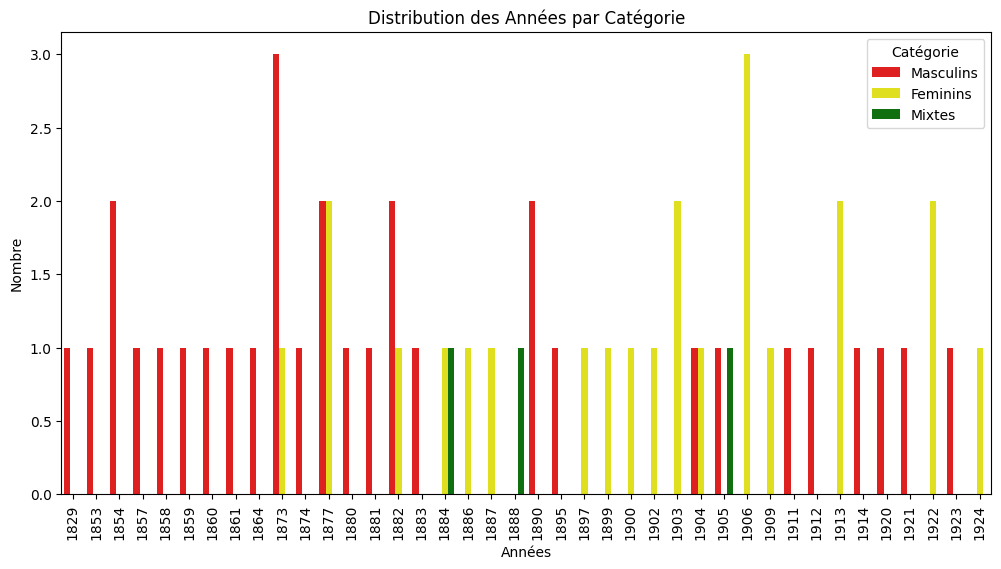

In [5]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(data=df_combined, x='Année', hue='Category', palette=['red', 'yellow', 'green'])
plt.title('Distribution des Années par Catégorie')
plt.xlabel('Années')
plt.ylabel('Nombre')
plt.xticks(rotation=90)
plt.legend(title='Catégorie')
plt.show()